In [21]:
!pip install citipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key1

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime



In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
# Create a practice set of random latitude and longitude combinations.
#lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#lat_lngs = zip(lats, lngs)

In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-27.88924046718092 -96.59052545764105
58.87649684685209 -83.49883603536146
33.169390328953455 -9.300419821235437
-1.960440081914058 -42.94272674358203
30.867456506614445 -100.58466000579952
84.1353385430213 99.17393033808708
-23.421292252396924 -53.33066626752385
-89.89489415957195 87.58506979609177
-30.752707449809876 -18.81469123299209
10.357283744205233 -156.0523649549632
21.15043148820152 0.8302345223314376
-32.55625899629868 -79.13944784073293
20.550849037313014 139.74332932229788
-63.99567493370075 115.73229812617956
65.59502955697948 52.225387120116466
-44.767921157335785 -171.96253594868904
-46.48526888851249 48.180097712803985
53.907200057375576 77.91305405312795
5.763689875524008 -0.18016773106876371
-0.39843306436647197 -134.9721220988392
87.01028457504671 -139.7522103226837
87.15469128904618 59.369620253877514
-40.395307172264395 160.49153374710693
77.49974428044726 -130.50826177921238
-72.00298469168041 -48.53274023954302
-71.53132236527293 127.31556038857252
78.9439993248

In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [ ]:
#set common variable to match class text.
weather_api_key = weather_api_key1

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [ ]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | asfi
Processing Record 4 of Set 1 | barreirinhas
Processing Record 5 of Set 1 | san angelo
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | umuarama
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | tessalit
Processing Record 12 of Set 1 | constitucion
Processing Record 13 of Set 1 | naze
Processing Record 14 of Set 1 | ust-tsilma
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | karasuk
Processing Record 18 of Set 1 | madina
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 1 | te anau
Processing Record 23 of 

In [ ]:
len(city_data)

546

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pisco,-13.7000,-76.2167,78.85,69,0,9.22,PE,2023-03-23 18:50:23
1,Asfi,32.2994,-9.2372,62.19,79,43,14.14,MA,2023-03-23 18:50:24
2,Barreirinhas,-2.7469,-42.8264,82.42,78,86,5.23,BR,2023-03-23 18:49:28
3,San Angelo,31.4638,-100.4370,78.12,69,100,14.97,US,2023-03-23 18:45:32
4,Khatanga,71.9667,102.5000,16.57,81,100,18.32,RU,2023-03-23 18:50:25
5,Umuarama,-23.7664,-53.3250,83.57,64,9,5.57,BR,2023-03-23 18:45:47
6,Albany,42.6001,-73.9662,55.81,86,99,3.00,US,2023-03-23 18:45:51
7,Jamestown,42.0970,-79.2353,52.52,95,100,11.50,US,2023-03-23 18:48:22
8,Hilo,19.7297,-155.0900,77.29,94,100,4.61,US,2023-03-23 18:47:44
9,Tessalit,20.1986,1.0114,81.50,14,6,9.57,ML,2023-03-23 18:50:25


In [ ]:
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [ ]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pisco,PE,2023-03-23 18:50:23,-13.7000,-76.2167,78.85,69,0,9.22
1,Asfi,MA,2023-03-23 18:50:24,32.2994,-9.2372,62.19,79,43,14.14
2,Barreirinhas,BR,2023-03-23 18:49:28,-2.7469,-42.8264,82.42,78,86,5.23
3,San Angelo,US,2023-03-23 18:45:32,31.4638,-100.4370,78.12,69,100,14.97
4,Khatanga,RU,2023-03-23 18:50:25,71.9667,102.5000,16.57,81,100,18.32
5,Umuarama,BR,2023-03-23 18:45:47,-23.7664,-53.3250,83.57,64,9,5.57
6,Albany,US,2023-03-23 18:45:51,42.6001,-73.9662,55.81,86,99,3.00
7,Jamestown,US,2023-03-23 18:48:22,42.0970,-79.2353,52.52,95,100,11.50
8,Hilo,US,2023-03-23 18:47:44,19.7297,-155.0900,77.29,94,100,4.61
9,Tessalit,ML,2023-03-23 18:50:25,20.1986,1.0114,81.50,14,6,9.57


In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

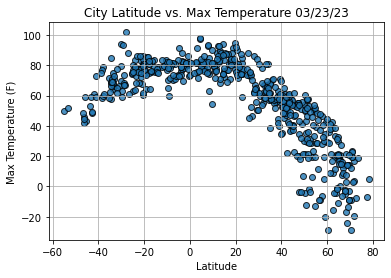

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

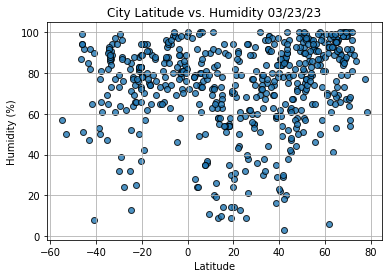

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

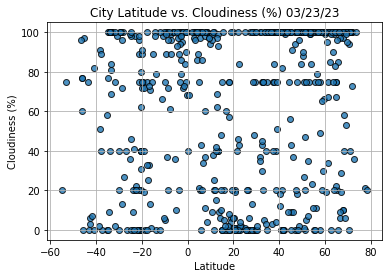

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

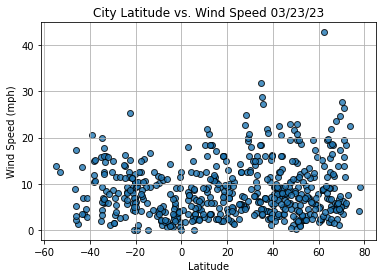

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()